In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook,load_workbook

res_path = 'xxxx'
load_path = 'xxxx'

res_path: F:/THU/post_craniotomy/results/13281/
load_path: F:/THU/post_craniotomy/data/13281/
trigger_path: F:/THU/post_craniotomy/data/trigger/13281/
allen_path: F:/THU/anesthesia/data/allen_brain_map/
stimu_path: F:/THU/post_craniotomy/data/stimuli/


# Parameters

In [2]:
day_info_list = ['_13281_d1', '_13281_d7', '_13281_d14', '_13281_d21', '_13281_d28']
folder_info = ["reco_13281_d1_195328", "reco_13281_d7_20241115_223348", "reco_13281_d14_20241121_191146", \
               "reco_13281_d21_20241129_213621", "reco_13281_d28_20241207_223245"]
x_days = [1,7,14,21,28]

# 01 Global stats

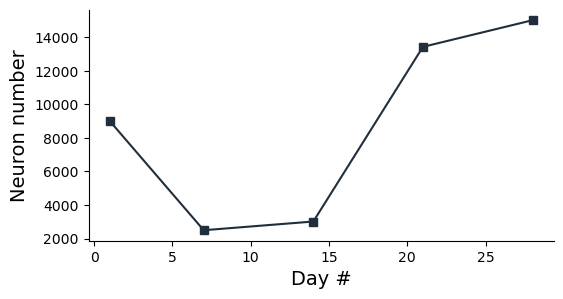

In [3]:
number_all = []
for day_info in day_info_list:
    data = np.load(res_path + "res_global_number_intensity" + day_info + "_dict.npy", allow_pickle = True).item()
    number_all.append(data['number_all'])

fig,ax = plt.subplots(figsize=(6,3),dpi=100,facecolor="w")
plt.plot(x_days, number_all, "s-", color = "#212f3c")
plt.xlabel("Day #", fontsize = 14)
plt.ylabel("Neuron number", fontsize = 14)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
plt.show()

# 02 Response number

active_num[angle]: [[357, 296, 298], [174, 90, 48], [73, 104, 59], [349, 220, 251], [796, 228, 183]]


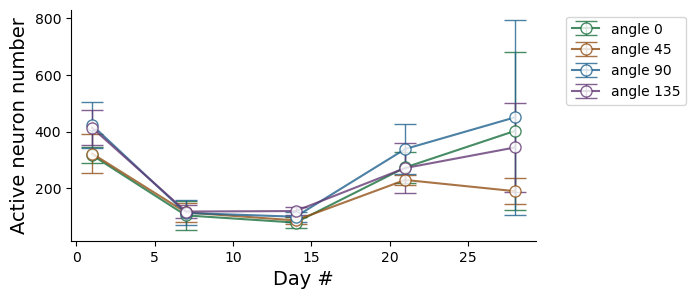

active_num_list: [array([1218, 1121,  984]), array([434, 349, 231]), array([312, 323, 341]), array([1318,  849,  888]), array([1961,  789, 1092])]


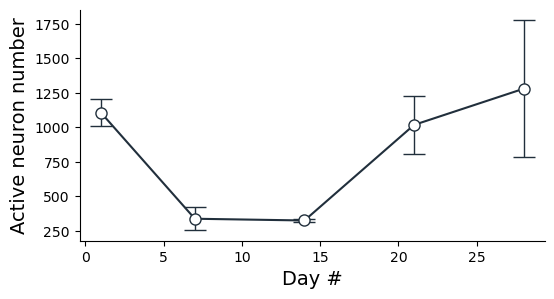

In [4]:
colors = ["#196F3D", "#935116", "#1F618D", "#633974"]
angle_names = ["angle 0", "angle 45", "angle 90", "angle 135"]

''' stable neurons '''
active_num = {}
for angle in [0, 45, 90, 135]:
    active_num[angle] = []
    
for day_info in day_info_list:
    data = np.load(res_path + "res_response_number_overlap_angles_sep" + day_info + "_dict.npy", allow_pickle = True).item()
    for angle in [0, 45, 90, 135]:
        active_num[angle].append(data[angle])
print("active_num[angle]:", active_num[0])

angle_avg_list, angle_std_list = [], []
for angle in [0, 45, 90, 135]:
    avg_list = [np.mean(i) for i in active_num[angle]]
    angle_avg_list.append(avg_list)
    std_list = [np.std(i) for i in active_num[angle]]
    angle_std_list.append(std_list)

fig,ax = plt.subplots(figsize=(6,3),dpi=100,facecolor="w")
for i in range(len(angle_avg_list)):
    plt.errorbar(x_days, angle_avg_list[i], yerr = angle_std_list[i], fmt = 'o-', ecolor = colors[i],  elinewidth = 1, 
             capthick = 1, color = colors[i], capsize = 8, ms = 8, mfc = 'w', alpha = 0.8, label = angle_names[i])
plt.xlabel("Day #", fontsize = 14)
plt.ylabel("Active neuron number", fontsize = 14)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

''' stable neurons of all angles '''

active_num_list = []
for day_info in day_info_list:
    data = np.load(res_path + "res_response_number_overlap_angles_tog" + day_info + "_list.npy", allow_pickle = True)
    active_num_list.append(data)
print("active_num_list:", active_num_list)

avg_list = [np.mean(i) for i in active_num_list]
std_list = [np.std(i) for i in active_num_list]

fig,ax = plt.subplots(figsize=(6,3),dpi=100,facecolor="w")
plt.errorbar(x_days, avg_list, yerr = std_list, fmt = 'o-', ecolor = "#212f3c",  elinewidth = 1, 
        capthick = 1, color = "#212f3c", capsize = 8, ms = 8, mfc = 'w', alpha = 1)
plt.xlabel("Day #", fontsize = 14)
plt.ylabel("Active neuron number", fontsize = 14)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
plt.show()

# 03 Response map

_13281_d1 pos_list: 4 ids_list: 1218


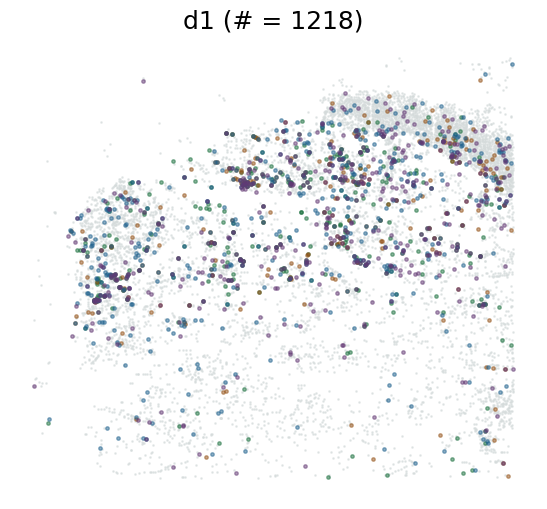

_13281_d7 pos_list: 4 ids_list: 434


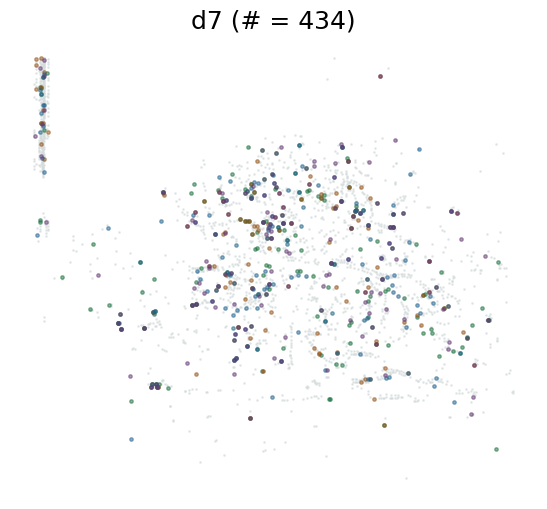

_13281_d14 pos_list: 4 ids_list: 312


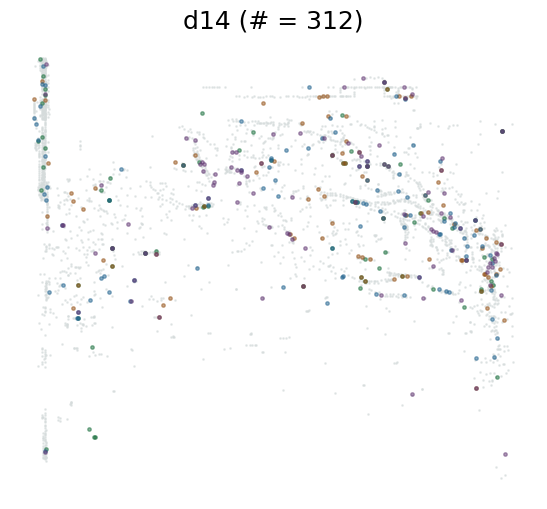

_13281_d21 pos_list: 4 ids_list: 1318


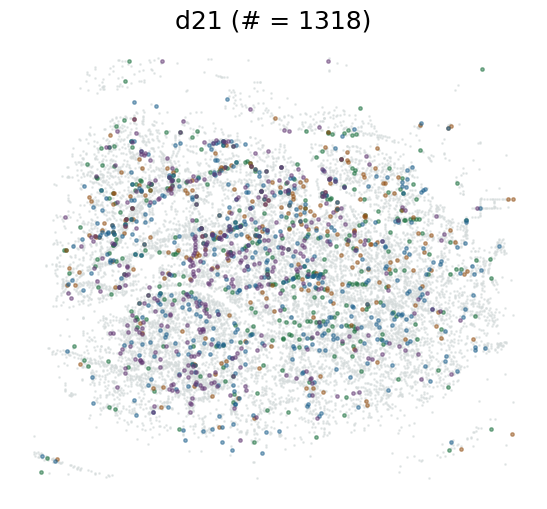

_13281_d28 pos_list: 4 ids_list: 1961


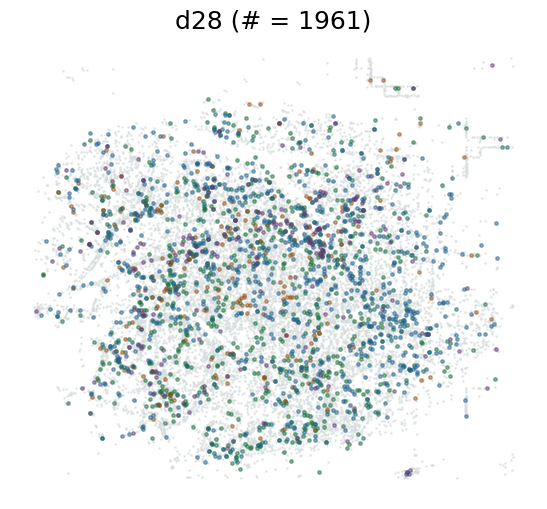

C:\Users\BBNC\AppData\Local\Temp\ipykernel_47140\3262120987.py:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, d_idx + 1)


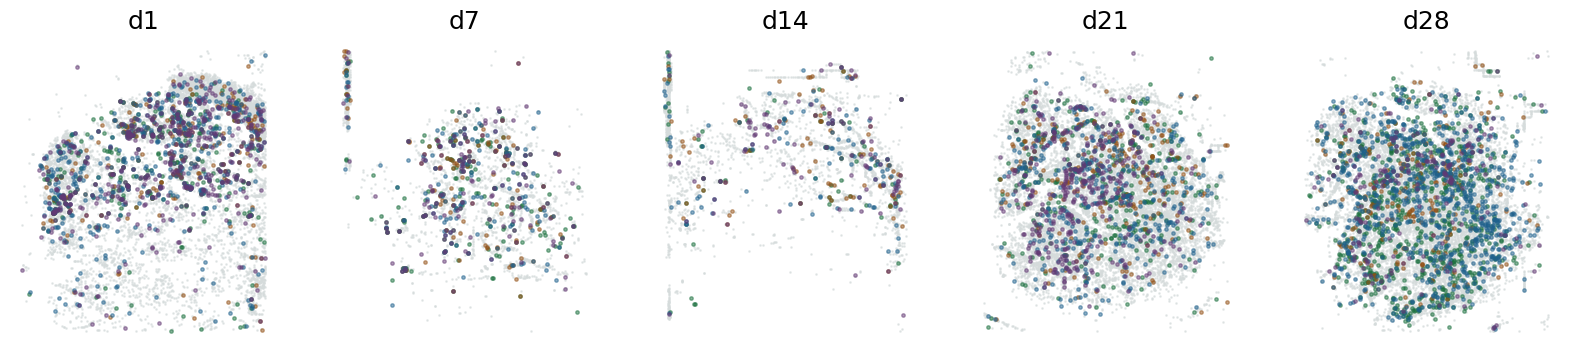

In [7]:
colors = ["#196F3D", "#935116", "#1F618D", "#633974"]
angle_names = ["angle 0", "angle 45", "angle 90", "angle 135"]

pos_overall = []

for d_idx in range(len(day_info_list)):
    day_info, folder = day_info_list[d_idx], folder_info[d_idx]
    day_name = day_info.split("_")[-1]
    # all pos
    whole_center = pd.read_csv(load_path + folder +  "/pos" + day_info + ".csv", names = ["x", "y", "z"])
    whole_center = whole_center.values
    neuron_x = whole_center[:, 0].reshape(len(whole_center))
    neuron_y = whole_center[:, 1].reshape(len(whole_center))
    neuron_z = whole_center[:, 2].reshape(len(whole_center))

    # selected pos
    data = np.load(res_path + "res_response_pos_overlap_angles_sep" + day_info + "_dict.npy", allow_pickle = True).item()
    ids = np.load(res_path + "res_response_ids_overlap_angles_sep" + day_info + "_dict.npy", allow_pickle = True).item()
    pos_list, ids_list = [], []
    for angle in [0, 45, 90, 135]:
        pos_fla = []
        for data_i in data[angle][:1]:
            pos_fla.extend(data_i)
        pos_list.append(pos_fla)
        for ids_fla in ids[angle][:1]:
            ids_list.extend(ids_fla)
    ids_list = list(set(ids_list))
    print(day_info, "pos_list:", len(pos_list), "ids_list:", len(ids_list))
        
    x_overall, y_overall = [], []
    # plot
    non_select_data_ids = [i for i in range(len(neuron_x)) if i not in ids_list]
    non_neuron_x, non_neuron_y = neuron_x[non_select_data_ids], neuron_y[non_select_data_ids]
    x_overall.append(non_neuron_x)
    y_overall.append(non_neuron_y)
    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neuron_x, non_neuron_y, s = 0.8, c = "#D5DBDB", alpha = 0.6)
    for i in range(len(pos_list)):
        select_neuron_x, select_neuron_y = [j[0] for j in pos_list[i]], [j[1] for j in pos_list[i]]
        plt.scatter(select_neuron_x, select_neuron_y, s = 6, c = colors[i], alpha = 0.5)
        x_overall.append(select_neuron_x)
        y_overall.append(select_neuron_y)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title(day_name + " (# = " + str(len(ids_list)) + ")", fontsize = 18)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    pos_overall.append([x_overall, y_overall])
    
# plot overall
fig, ax = plt.subplots(figsize = (20, 4), dpi= 100,facecolor="w")
for d_idx in range(len(day_info_list)):
    day_name = day_info_list[d_idx].split("_")[-1]
    ax = plt.subplot(1, 5, d_idx + 1)
    non_neuron_x, non_neuron_y = pos_overall[d_idx][0][0], pos_overall[d_idx][1][0]
    plt.scatter(non_neuron_x, non_neuron_y, s = 0.8, c = "#D5DBDB", alpha = 0.6)
    for i in range(len(angle_names)):
        select_neuron_x, select_neuron_y = pos_overall[d_idx][0][i + 1], pos_overall[d_idx][1][i + 1]
        plt.scatter(select_neuron_x, select_neuron_y, s = 6, c = colors[i], alpha = 0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.title(day_name, fontsize = 18)
    plt.xticks([])
    plt.yticks([])
plt.show()
        
        
        

# 04 Functional connectivity

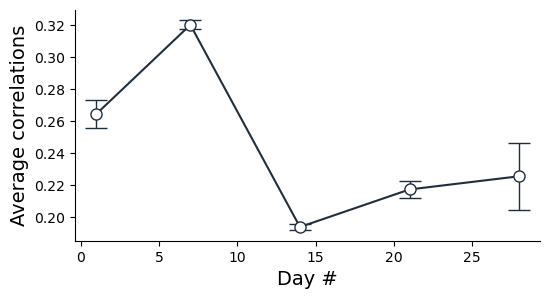

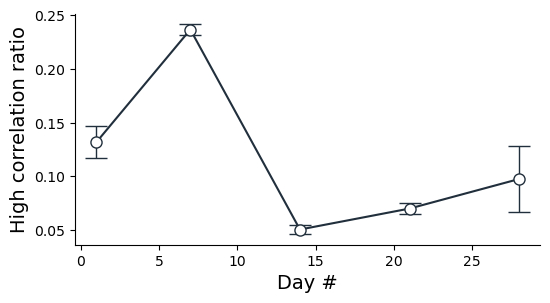

In [5]:
corr_avg, corr_large_ratio = [], []
for day_info in day_info_list:
    data = np.load(res_path + "res_angle_stable_neurons_corr_matrix_stat" + day_info + "_dict.npy", allow_pickle = True).item()
    corr_avg.append(data["corr_avg"])
    corr_large_ratio.append(data["corr_large_ratio"])

avg_list = [np.mean(i) for i in corr_avg]
std_list = [np.std(i) / np.sqrt(4) for i in corr_avg]
fig,ax = plt.subplots(figsize=(6,3),dpi=100,facecolor="w")
plt.errorbar(x_days, avg_list, yerr = std_list, fmt = 'o-', ecolor = "#212f3c",  elinewidth = 1, 
             capthick = 1, color = "#212f3c", capsize = 8, ms = 8, mfc = 'w', alpha = 1)
plt.xlabel("Day #", fontsize = 14)
plt.ylabel("Average correlations", fontsize = 14)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
plt.show()

avg_list = [np.mean(i) for i in corr_large_ratio]
std_list = [np.std(i) / np.sqrt(4) for i in corr_large_ratio]
fig,ax = plt.subplots(figsize=(6,3),dpi=100,facecolor="w")
plt.errorbar(x_days, avg_list, yerr = std_list, fmt = 'o-', ecolor = "#212f3c",  elinewidth = 1, 
             capthick = 1, color = "#212f3c", capsize = 8, ms = 8, mfc = 'w', alpha = 1)
plt.xlabel("Day #", fontsize = 14)
plt.ylabel("High correlation ratio", fontsize = 14)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
plt.show()

C:\Users\BBNC\AppData\Local\Temp\ipykernel_69648\135556081.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(len(day_info_list), 1, i + 1)


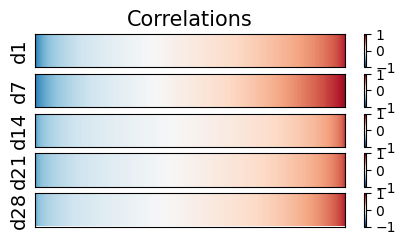

In [7]:
''' correlation list '''

day_names = []
for day_info in day_info_list:
    day_name = day_info.split("_")[-1]
    day_names.append(day_name)

angle_data = []
for day_info in day_info_list:
    day_data = []
    data = np.load(res_path + "res_angle_stable_neurons_corr_list" + day_info + "_dict.npy", allow_pickle = True).item()
    for angle in [0, 45, 90, 135]:
        day_data.extend(data[angle])
    angle_data.append(day_data)
        

fig,ax = plt.subplots(figsize=(5,2.5),dpi=100,facecolor="w")
for i in range(len(day_info_list)):
    ax = plt.subplot(len(day_info_list), 1, i + 1)
    matrix_plot = angle_data[i]
    matrix_plot.sort()
    matrix_plot = np.array(matrix_plot).reshape((1, len(matrix_plot)))
    caxes = ax.matshow(matrix_plot, interpolation ='nearest', cmap = "RdBu_r", aspect = 'auto', vmin = -1, vmax = 1) 
    fig.colorbar(caxes) 
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(day_names[i], fontsize = 14)
    if i == 0:
        plt.title("Correlations", fontsize = 15)
plt.show()

day_names: 5 ['d1', 'd7', 'd14', 'd21', 'd28']
x: 2940862 ['d1', 'd1', 'd1', 'd1', 'd1']
hue: 2940862 ['angle 0', 'angle 0', 'angle 0', 'angle 0', 'angle 0']
data_flatten: 2940862 [0.382279439671661, 0.09961201882100806, 0.02865106375401632, 0.03221150011556045, 0.11213303984588918]


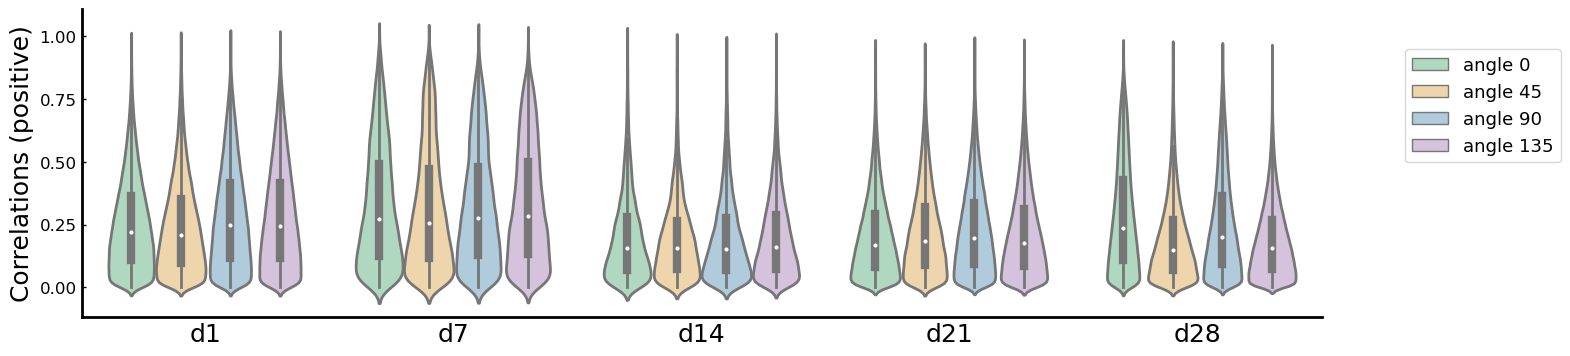

In [13]:
''' correlation distribution '''
x, hue, data_flatten, day_names = [], [], [], []
for day_info in day_info_list:
    day_name = day_info.split("_")[-1]
    day_names.append(day_name)
    data = np.load(res_path + "res_angle_stable_neurons_corr_pos_list" + day_info + "_dict.npy", allow_pickle = True).item()
    for angle in [0, 45, 90, 135]:
        data_flatten.extend(data[angle])  
        x.extend([day_name] * len(data[angle]))
        hue.extend(["angle " + str(angle)] * len(data[angle]))
print("day_names:", len(day_names), day_names)
print("x:", len(x), x[:5])
print("hue:", len(hue), hue[:5])
print("data_flatten:", len(data_flatten), data_flatten[:5])

fig,ax = plt.subplots(figsize=(16,4),dpi=100,facecolor="w")
ax = plt.subplot(1, 1, 1)
sns.violinplot(x = x, y = data_flatten, hue = hue, order = day_names, ax = ax, palette = colors_light,
                    width = 0.8, linewidth = 2, notch = False, alpha =1)
ax.legend(bbox_to_anchor=(1.2,0.9), fontsize = 13)
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=20,bottom=False)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_axisbelow(True)
ax.set_ylabel("Correlations (positive)", fontsize = 18)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 18)
plt.show()